In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde
107,Natal,2019-01-02,14.70,1035,1
54,Salvador,2019-01-01,46.54,1037,3
105,Salvador,2019-01-01,32.83,1037,1
63,Fortaleza,2019-01-01,118.17,1004,1
30,Natal,2018-10-02,856.00,853,4
189,Natal,2019-01-02,139.73,1037,2
202,Natal,2019-01-02,22.45,1036,1


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade     0
Data       0
Vendas     0
LojaID     0
Qtde       0
Receita    0
dtype: int64

In [ ]:
df["Vendas"].mean()

122.61180089485438

In [ ]:
#Criando nova coluna
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [ ]:
#Transformando a coluna data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#Agrpamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
#Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferenca de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
#Criando coluna com o trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
44,Natal,2019-01-03,500.00,852,4,2000.00,2019,1,3,367 days,1
79,Natal,2019-02-28,557.00,852,4,2228.00,2019,2,28,423 days,1
209,Natal,2019-01-02,69.98,1034,2,139.96,2019,1,2,366 days,1
13,Natal,2018-09-12,458.00,852,4,1832.00,2018,9,12,254 days,3
50,Aracaju,2018-01-01,7.52,1522,5,37.60,2018,1,1,0 days,1
104,Recife,2019-01-01,40.11,983,5,200.55,2019,1,1,365 days,1
180,Salvador,2019-01-02,116.63,1035,2,233.26,2019,1,2,366 days,1
0,Salvador,2018-01-01,31.06,1037,3,93.18,2018,1,1,0 days,1
65,Fortaleza,2019-01-01,145.20,1005,2,290.40,2019,1,1,365 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1


In [ ]:
#Filtrando as vendas de 2019 do mes de marco
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
125,Salvador,2019-03-02,25.00,1037,2,50.00,2019,3,2,425 days,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,2019,3,2,425 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1


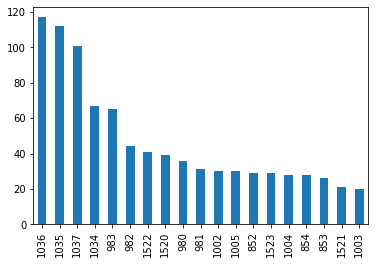

In [ ]:
df["LojaID"].value_counts(ascending=False).plot.bar()

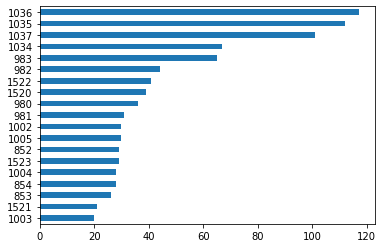

In [ ]:
#Grafico de barras
df["LojaID"].value_counts(ascending=True).plot.barh()

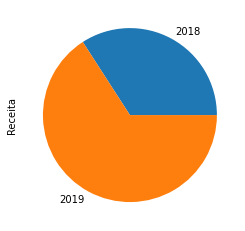

In [ ]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

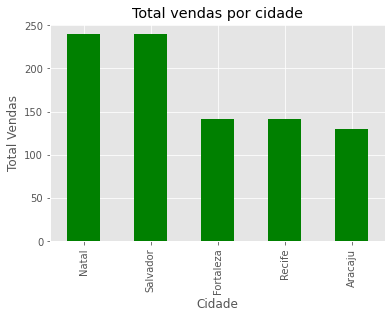

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

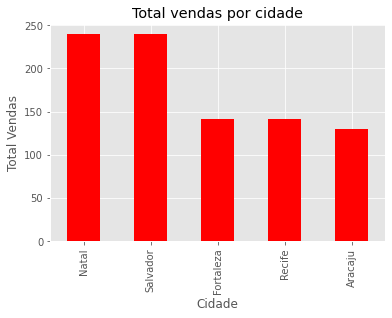

In [ ]:
#Alterando a cor
df["Cidade"]. value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

In [ ]:
#Selecionando apenas vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

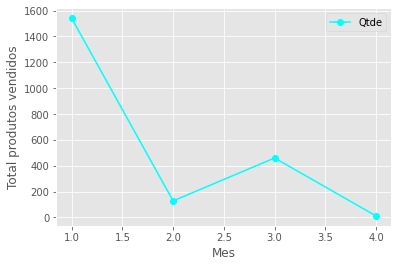

In [ ]:
#Alterando o tipo de grafico e total de produtos vendidos no mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", color="cyan")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend();

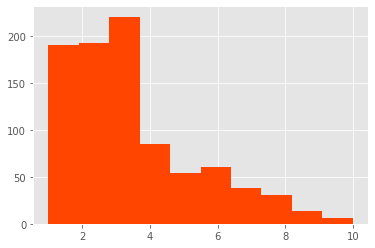

In [ ]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

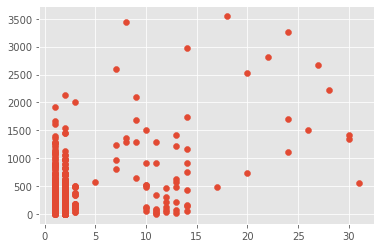

In [ ]:
#Grafico de dispersao
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

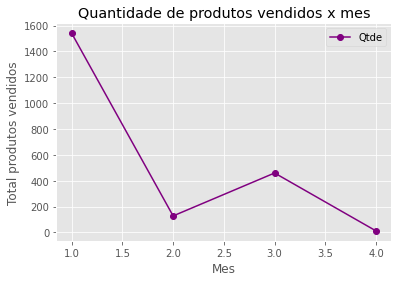

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", color="purple")
plt.title("Quantidade de produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png");